In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import namedtuple
from pathlib import Path
import os
Cluster = namedtuple('Point', 'x y z')#meant to convey x,y,z mean of cluster
#repopath = Path(__file__).parent
fname = r'D:\ObstacleSegmentation\1636310276 - 4-3877 ms.txt'
#file = os.path.join(repopath,fname)
#output = os.path.join(repopath,'beta_angles_' + fname)

#create pandas dataframe from asc file
df = pd.read_csv(fname,header=None,delimiter = ',')

#rename the columns based on output from cloudcompare 
#df.columns =['x','y','z', 'dist','ang','time','r','g','b','empty']
df.columns = ['x', 'y', 'z', 'r', 'g', 'b', 'dist','ang', 'time']
#df = pd.read_csv('D:/ObstacleSegmentation/1636310276.7642572_LidarSensor1_pointcloud.asc')
npdf = df[['x','y','z']].to_numpy()

In [12]:
clustering = DBSCAN(eps=.5, min_samples=2).fit(npdf)


(array([33366.,  1034.,   971.,  1202.,  5173.,  1473.,   642.,   986.,
         1592.,   899.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
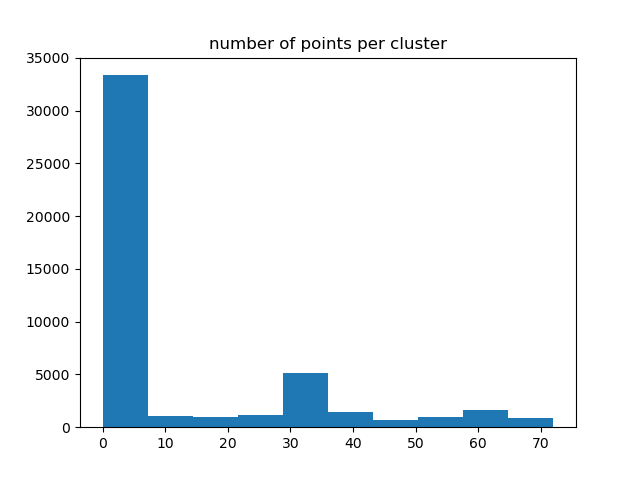

In [13]:
%matplotlib widget
plt.title('number of points per cluster')
plt.hist(clustering.labels_)



In [15]:
df['clusterfromdbscan'] = clustering.labels_
dfsample = df[df.clusterfromdbscan < 10]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
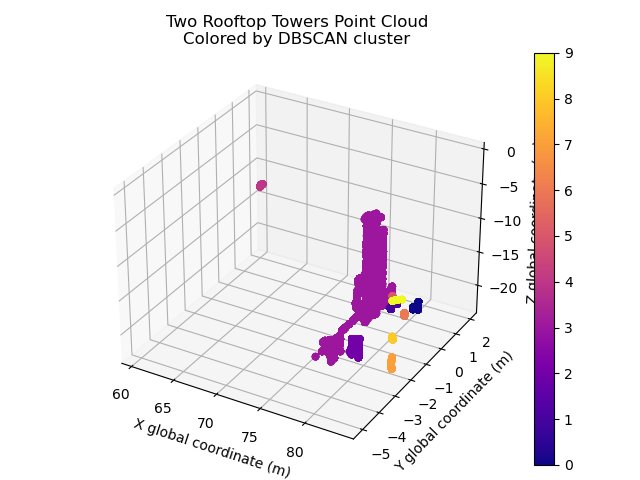

In [30]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(dfsample.x,dfsample.y,dfsample.z,c = dfsample.clusterfromdbscan,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by DBSCAN cluster")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
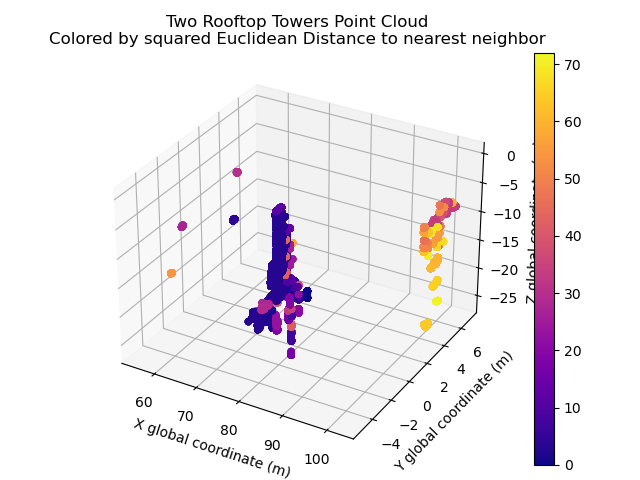

In [31]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
p = ax3D.scatter(df.x,df.y,df.z,c = clustering.labels_,cmap = plt.get_cmap("plasma"))
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by squared Euclidean Distance to nearest neighbor")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [18]:
df.head()

,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan
0,83.635971,-0.627242,-16.415802,0,255,255,84.928581,0.0,4.0,0
1,81.947716,-1.106287,-16.119019,0,255,255,83.219475,0.0,5.0,1
2,82.314034,-4.088839,-16.200188,0,255,255,83.686920,0.0,5.0,2
3,80.956223,-4.508443,-15.964992,0,255,255,82.332481,0.0,5.0,3
4,60.562466,1.800758,-12.351626,0,255,255,61.523918,0.0,5.0,4


In [19]:
exampleclusterdf = df[df['clusterfromdbscan']==0]
exampleclusterdf.describe()


,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan
count,531.000000,531.000000,531.000000,531.0,531.0,531.0,531.000000,531.000000,531.000000,531.0
mean,83.594497,-0.681671,-16.910001,0.0,255.0,255.0,82.720240,0.022216,2264.082863,0.0
std,0.077383,0.093085,0.418089,0.0,0.0,0.0,1.327544,0.020919,1214.572830,0.0
min,83.441147,-0.869109,-17.614880,0.0,255.0,255.0,80.840996,0.000000,4.000000,0.0
25%,83.608574,-0.652875,-17.147047,0.0,255.0,255.0,81.600342,0.004028,1877.500000,0.0
50%,83.633560,-0.649976,-16.939560,0.0,255.0,255.0,82.524559,0.027187,2571.000000,0.0
75%,83.643898,-0.627242,-16.483442,0.0,255.0,255.0,83.454033,0.033425,3233.500000,0.0
max,83.646660,-0.612867,-16.415802,0.0,255.0,255.0,84.928581,0.155373,3783.000000,0.0


In [33]:
def XYZmean(df):
    print(type(df))
    xmean=np.mean(df['x'])
    ymean=np.mean(df.y)
    zmean=np.mean(df.z)
    xstd=np.std(df.x)
    ystd=np.std(df.y)
    zstd=np.std(df.z)
    rad=2*max([xstd,ystd,zstd])
    return Cluster(xmean, ymean, zmean, rad) #assigning to tuple "cluster"

cluster_centers=dict.fromkeys(df.clusterfromdbscan.unique())
for cluster in df.clusterfromdbscan.unique():  
    tempclusterseries = df[df['clusterfromdbscan']==cluster][['x', 'y', 'z']].agg('mean') #grabs all points associated with cluster in for loop step
    
    cluster_centers[cluster]= Cluster(tempclusterseries.x,tempclusterseries.y,tempclusterseries.z) #makes cluster series type into dict, 'cluster_centers.x,...'
#print(type(cluster_centers))
#cluster_centers


KeyError: "['radius'] not in index"

4.0920763016215735


(array([ 5.,  0.,  0.,  0.,  0., 37.,  0.,  0.,  0., 31.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
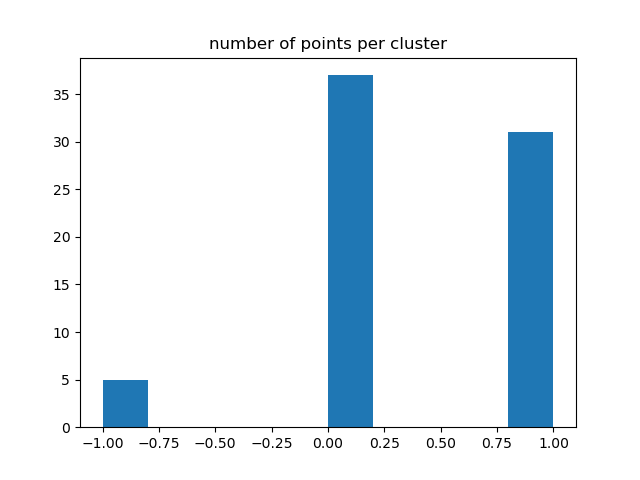

In [21]:
#Associate clusters by neighborhood
# np.array(cluster_centers.items())
cluster_center_array=pd.DataFrame.from_dict(cluster_centers,orient='index').to_numpy()
LIDAR_range=100
elevation_angle=(30*np.pi)/180
number_beams=16
raster_buffer=1.25 #25%
distance_between_raster_lines=LIDAR_range*np.tan(elevation_angle / number_beams)*raster_buffer
print(distance_between_raster_lines)
neighborhood_clustering = DBSCAN(eps=distance_between_raster_lines, min_samples=2).fit(cluster_center_array)
neighborhood_clustering_variable = neighborhood_clustering.labels_

%matplotlib widget
plt.title('number of points per cluster')
plt.hist(neighborhood_clustering.labels_)


In [22]:
# for point,newcluster in neighborhood_clustering.labels_
newclusters = pd.DataFrame(neighborhood_clustering.labels_)
newclusters.columns = ['newcluster']
clustercenterdf = pd.DataFrame(cluster_center_array)

clustercenterdf = clustercenterdf.join(newclusters)

clustercenterdf.columns=['x','y','z','newcluster']
print(clustercenterdf)

old2newclustermap = clustercenterdf.newcluster.to_dict()

df['newcluster'] = df['clusterfromdbscan'].map(old2newclustermap)


             x         y          z  newcluster
0    83.594497 -0.681671 -16.910001           0
1    81.481753 -1.064316 -16.740730           0
2    82.050550 -3.735675 -16.804668           0
3    81.363324 -2.647074 -10.815666           0
4    60.553583  1.825578 -12.389487          -1
..         ...       ...        ...         ...
68  102.438889  4.523599  -8.745856           1
69  102.198635  3.945299  -8.814689           1
70  102.435394  3.526361 -12.319211           1
71  101.693035  5.160947 -22.851527           1
72  101.432617  5.200641 -12.405409           1

[73 rows x 4 columns]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
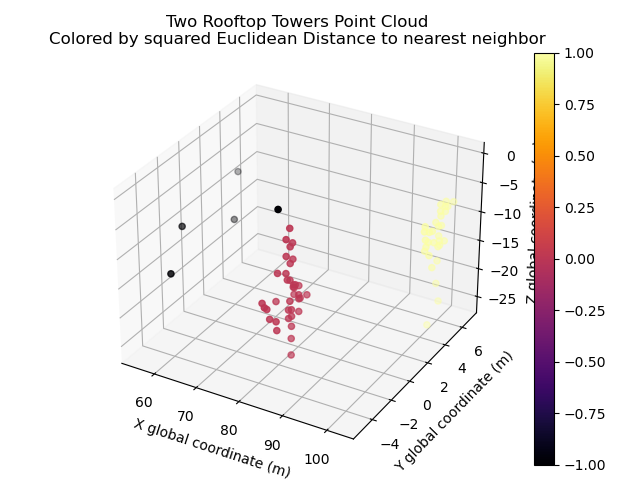

In [34]:
%matplotlib widget
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_zlabel('Z global coordinate (m)')
#p = ax3D.scatter(df.x,df.y,df.z)#original points colored by neighborhood, removed "",c = df.newcluster,cmap = plt.get_cmap("plasma")""
p = ax3D.scatter(clustercenterdf.x,clustercenterdf.y,clustercenterdf.z,c = clustercenterdf.newcluster,cmap = plt.get_cmap("inferno"))#just centers that were basis for neighbor
# plt.suptitle("Two Rooftop Towers Point Cloud")
plt.title("Two Rooftop Towers Point Cloud\nColored by squared Euclidean Distance to nearest neighbor")
plt.xlabel('X global coordinate (m)')
plt.ylabel('Y global coordinate (m)')
plt.tight_layout()
fig.colorbar(p,ax=ax3D)

In [24]:
exampleclusterdf2 = df[df['clusterfromdbscan']==1]
exampleclusterdf2.describe()

,x,y,z,r,g,b,dist,ang,time,clusterfromdbscan,newcluster
count,994.000000,994.000000,994.000000,994.0,994.0,994.0,994.000000,994.000000,994.000000,994.0,994.0
mean,81.481753,-1.064316,-16.740730,0.0,255.0,255.0,80.406242,0.024144,2472.498994,1.0,0.0
std,0.324459,0.069167,0.457318,0.0,0.0,0.0,1.257772,0.023619,1033.908731,0.0,0.0
min,81.209236,-1.148731,-17.622786,0.0,255.0,255.0,78.555359,0.000000,5.000000,1.0,0.0
25%,81.248268,-1.110498,-17.139531,0.0,255.0,255.0,79.797180,0.009593,1994.250000,1.0,0.0
50%,81.281296,-1.091453,-16.750393,0.0,255.0,255.0,80.160194,0.025245,2561.500000,1.0,0.0
75%,81.940125,-1.033107,-16.319066,0.0,255.0,255.0,81.078964,0.033362,3289.750000,1.0,0.0
max,81.959137,-0.917861,-16.102839,0.0,255.0,255.0,83.219475,0.155373,3877.000000,1.0,0.0


In [25]:
def specialangle(pt1,pt2):
    psi = np.abs(pt1.ang - pt2.ang)
    num = pt1.dist * np.sin(psi)
    den = (pt1.dist - pt2.dist) * np.cos(psi)
    beta = np.arctan2(num,den)
    return beta

for cluster in clustercenterdf.newcluster.unique(): #loop through all points in cluster neighborhood
    for point1 in clustercenterdf[clustercenterdf.newcluster==cluster].iterrows():
        print(point1)
        #for point2 in clustercenterdf[clustercenterdf.newcluster==cluster].iterrows():
		#   If point1 = point2
		#		continue
		#	Else
        
#for row in range(0,len(df_byx)-1,1):
#    df_byx.at[row,'beta'] = specialangle(df_byx.iloc[row], df_byx.iloc[row+1])
            

(0, x             83.594497
y             -0.681671
z            -16.910001
newcluster     0.000000
Name: 0, dtype: float64)
(1, x             81.481753
y             -1.064316
z            -16.740730
newcluster     0.000000
Name: 1, dtype: float64)
(2, x             82.050550
y             -3.735675
z            -16.804668
newcluster     0.000000
Name: 2, dtype: float64)
(3, x             81.363324
y             -2.647074
z            -10.815666
newcluster     0.000000
Name: 3, dtype: float64)
(5, x             81.209236
y             -0.918864
z            -15.859429
newcluster     0.000000
Name: 5, dtype: float64)
(6, x             83.509384
y             -1.456814
z            -16.453460
newcluster     0.000000
Name: 6, dtype: float64)
(7, x             83.609220
y             -2.281759
z            -22.032061
newcluster     0.000000
Name: 7, dtype: float64)
(8, x             83.624952
y             -2.247319
z            -18.228825
newcluster     0.000000
Name: 8, dtype: float64)


In [37]:
def calculate_center(thiscluster): #only consider x and y for intersection overlap algorithm, downstream from neighborhood clusters
    x_center = thiscluster.x.mean()
    y_center = thiscluster.y.mean()
    x_std = thiscluster.x.std()
    y_std = thiscluster.y.std()
    rad = 2*max([x_std,y_std])
    return x_center,y_center,rad

In [38]:
circ1 = calculate_center(exampleclusterdf)
circ2 = calculate_center(exampleclusterdf2)
print(f"cluster1 {circ1}\ncluster2 {circ2}")

cluster1 (83.59449696224105, -0.6816712636214689, 0.18616923119755666)
cluster2 (81.48175272941248, -1.0643157313370224, 0.6489181568157188)


In [39]:
cluster_radius=dict.fromkeys(df.clusterfromdbscan.unique())
for cluster in df.clusterfromdbscan.unique():  
    [x_center, y_center,rad] = calculate_center(df[df['clusterfromdbscan']==cluster]) #grabs all points associated with cluster in for loop step
    
    cluster_radius[cluster]= [x_center, y_center,rad]

In [43]:
cluster_radius_array=pd.DataFrame.from_dict(cluster_radius,orient='index')
cluster_radius_array.columns=['x','y','rad']
cluster_radius_array

,x,y,rad
0,83.594497,-0.681671,1.861692e-01
1,81.481753,-1.064316,6.489182e-01
2,82.050550,-3.735675,5.180564e-01
3,81.363324,-2.647074,1.564269e+00
4,60.553583,1.825578,1.133265e-01
...,...,...,...
68,102.438889,4.523599,2.866156e-14
69,102.198635,3.945299,1.781343e-01
70,102.435394,3.526361,2.866568e-14
71,101.693035,5.160947,1.281105e-01


In [28]:
def intersection_area(x0, y0, R, x1, y1, r):
    """Return the area of intersection of two circles.

    The circles have radii R and r and centers (x1,y1) and (x2,y2).

    """
    d=math.sqrt((x1-x0)**2 + (y1-y0)**2)
    if d <= abs(R-r):
        # One circle is entirely enclosed in the other.
        return np.pi * min(R, r)**2
    if d >= r + R:
        # The circles don't overlap at all.
        return 0

    r2, R2, d2 = r**2, R**2, d**2
    alpha = np.arccos((d2 + r2 - R2) / (2*d*r))
    beta = np.arccos((d2 + R2 - r2) / (2*d*R))
    return ( r2 * alpha + R2 * beta -
             0.5 * (r2 * np.sin(2*alpha) + R2 * np.sin(2*beta))
           ) / (np.pi * min(R,r)**2) #area of intersection normalized by area of smallest circle, % containment
intersection_area(circ1[0],circ1[1],circ1[2],circ2[0],circ2[1],circ2[2])

0

In [58]:
#return overlap score for each pair of clusters
ptlist = cluster_radius_array.index.to_list()
overlapsdict = dict.fromkeys(ptlist)
for idx1,pt1 in cluster_radius_array.iterrows():
    overlapsdict[idx1] = dict.fromkeys(ptlist)
    for idx2,pt2 in cluster_radius_array.iterrows():
        overlapsdict[idx1][idx2] = intersection_area(pt1.x, pt1.y, pt1.rad, pt2.x, pt2.y, pt2.rad)


In [69]:
#create dictionary of points with threshold of each root point
overlap_thresh=0
closepointsdict = dict.fromkeys(ptlist)
for point in overlapsdict.keys():
    ptsinrange = []
    for point2, distance in overlapsdict[point].items():
        if distance < overlap_thresh:
            ptsinrange.append(point2)
    closepointsdict[point] = ptsinrange

In [70]:
def getadjacent(confirmedhits,pt2check,need2checkstill):
    # current code requires set to be closed (e.g. dictionary must not reference points that aren't in dictionary
    # if pt2check in testdict: 
    need2checkstill = need2checkstill | (set(closepointsdict[pt2check]) - confirmedhits)
    if len(need2checkstill) > 0:
        thispt = need2checkstill.pop()
        confirmedhits = confirmedhits | set([thispt])
        return getadjacent(confirmedhits,thispt,need2checkstill)
    else:
        return confirmedhits

In [79]:
groupnum = 0
ungroupedpts = ptlist
print(ungroupedpts)
clusters_dict = {}
while len(ungroupedpts) > 0:
    adjacent_confirmed = set()
    need2checkstill = set()
    neighbors = getadjacent(adjacent_confirmed,ungroupedpts[0],need2checkstill)
    print(neighbors)
    clusters_dict[groupnum] = neighbors
    ungroupedpts = list(set(ungroupedpts) - set(neighbors))
    groupnum+=1

plt.bar(clusters_dict.keys(),[len(v) for k,v in clusters_dict.items()])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72]
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set()
set

KeyboardInterrupt: 